# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4201,4201,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2011,77000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.90
4383,4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.50
1779,1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,7.83
4020,4020,Maruti Swift VDI BSIV,Kolkata,2013,115195,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,3.85
3248,3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,NaN,3.32


In [4]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4189 non-null   object 
 10  Power              4189 non-null   object 
 11  Seats              4185 non-null   float64
 12  New_Price          580 non-null    object 
 13  Price              4213 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 493.7+ KB


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,4213.000000,4213.000000,4213.000000,4185.000000,4213.000000
mean,3039.503204,2013.396392,57529.234987,5.277419,9.466622
std,1725.925700,3.237586,38099.559922,0.805531,11.229414
min,0.000000,1998.000000,600.000000,0.000000,0.440000
25%,1563.000000,2011.000000,34000.000000,5.000000,3.500000
50%,3060.000000,2014.000000,52827.000000,5.000000,5.680000
75%,4524.000000,2016.000000,72100.000000,5.000000,9.900000
max,6018.000000,2019.000000,775000.000000,10.000000,160.000000


## Data preprocessing
- Reformat
- 결측치 검토

### 결측치 검토

In [5]:
train_data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 24
Power                  24
Seats                  28
New_Price            3633
Price                   0
dtype: int64

우선 결측치가 1개인 `Mileage`를 살펴봅니다.

In [6]:
# Mileage가 결측치인 row 확인하기
train_data[train_data["Mileage"].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.0


In [7]:
# Mileage가 결측치인 row와 같은 모델의 차량이 있는지 확인하기
train_data[train_data["Name"] == "Mahindra E Verito D4"]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.0


다음으로 결측치가 있었던 `Engine`을 살펴봅니다.

In [8]:
# Engine이 결측치인 row 확인하기
train_data[train_data["Engine"].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
2623,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,NaN,18.00
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,14.50
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,NaN,1.65
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,4.70
2530,2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,17.89
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,NaN,0.90
4152,4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,16.11
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7 kmpl,NaN,NaN,NaN,NaN,3.15


In [9]:
# Engine이 결측치가 아닌 같은 모델이 있는지 확인합니다.
train_data[(train_data["Name"].isin(train_data[train_data["Engine"].isna()]["Name"].unique())) & train_data["Engine"].notna()].sort_values("Name")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4767,4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8 kmpl,1493 CC,100 bhp,5.0,NaN,1.10
3145,3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7 kmpl,1198 CC,88.8 bhp,5.0,NaN,1.99


다음으로 결측치가 있었던 `Seats`을 살펴봅니다.

In [10]:
# Seats이 결측치인 row 확인하기
train_data[train_data["Seats"].isna()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,NaN,3.60
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.50
2623,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,NaN,18.00
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,14.50
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,NaN,1.65
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,4.70
2530,2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,17.89
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,NaN,0.90


In [11]:
# Seats이 결측치가 아닌 같은 모델이 있는지 확인합니다.
train_data[(train_data["Name"].isin(train_data[train_data["Seats"].isna()]["Name"].unique())) & train_data["Seats"].notna()].sort_values("Name")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3806,3806,Honda City 1.5 EXI,Pune,2001,125943,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,5.0,NaN,1.45
1279,1279,Honda City 1.5 EXI,Pune,2005,98437,Petrol,Manual,First,13.0 kmpl,1493 CC,100 bhp,5.0,NaN,1.15
5957,5957,Honda City 1.5 EXI,Coimbatore,2004,186679,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,5.0,NaN,1.76
4767,4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8 kmpl,1493 CC,100 bhp,5.0,NaN,1.10
3145,3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7 kmpl,1198 CC,88.8 bhp,5.0,NaN,1.99


아래 feature는 삭제합니다.
- `Unnamed: 0`: Index와 중복됩니다.
- `New_Price`: 결측치 비율이 약 86%로 매우 높습니다.

아래 feature가 결측치인 row는 삭제합니다.
- `Mileage`:
  - 해당 feature가 결측치인 row는 1개로 적고,
  - 참고할 수 있는 같은 이름(`Name`)의 차량 데이터가 없으며,
  - 모델에 따라 다를 수 있는 값을 평균/중앙값 등으로 대체하기 어렵습니다.
- `Engine`:
  - 해당 feature가 결측치인 row는 24개로 전체의 0.5% 정도이고,
  - 참고할 수 있는 같은 이름(`Name`)의 차량 데이터가 적어 여전히 결측치가 남아있는 row가 대부분이며,
  - 모델명이 같더라도 옵션에 따라 엔진의 용량이 다를 수 있기 때문에 값을 대체하기 어렵습니다.
- `Power`:
  - 해당 feature가 결측치인 row는 24개로 전체의 0.5% 정도이고,
  - 모델명이 같더라도 옵션에 따라 엔진의 파워가 다를 수 있기 때문에 값을 대체하기 어렵습니다.
- `Seats`:
  - 해당 feature가 결측치인 row는 28개로 전체의 0.7% 정도이고,
  - 참고할 수 있는 같은 이름(`Name`)의 차량 데이터가 적어 여전히 결측치가 남아있는 row가 대부분입니다.

In [12]:
train_data.drop(columns=["Unnamed: 0", "New_Price"], inplace=True)
train_data.dropna(inplace=True)

### Reformat
일부 열의 경우 수치형 변수로 나타낼 수 있으나, 단위(CC 등) 표현으로 인해 string형으로 되어있습니다. \
용이한 분석을 위해 해당 부분을 처리합니다.

In [13]:
train_data["Mileage"] = train_data["Mileage"].str.extract(r'(\d+\.\d+|\d+)')
train_data["Engine"] = train_data["Engine"].str.extract(r'(\d+\.\d+|\d+)')
train_data["Power"] = train_data["Power"].str.extract(r'(\d+\.\d+|\d+)')
print(f'{train_data["Mileage"].isna().sum()} {train_data["Engine"].isna().sum()} {train_data["Power"].isna().sum()}')

0 0 66


`Power`에는 'null bhp'라는 값이 있었습니다. 해당 값으로 인해 발생한 결측치를 다시 제거합니다.

In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data["Mileage"] = train_data["Mileage"].astype("float")
train_data["Engine"] = train_data["Engine"].astype("float")
train_data["Power"] = train_data["Power"].astype("float")

In [16]:
len(train_data)

4118

In [17]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4201,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2011,77000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,2.90
4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36,1197.0,78.9,5.0,4.50
1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.10,2179.0,140.0,7.0,7.83
4020,Maruti Swift VDI BSIV,Kolkata,2013,115195,Diesel,Manual,First,25.20,1248.0,74.0,5.0,3.85
3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47,1198.0,73.9,5.0,3.32


## Analysis
- `Location` - `Price`
- `Year` - `Price`
- `Kilometers_Driven` - `Price`
- `Mileage` - `Price`
- `Engine` - `Price`
- `Power` - `Price`
- 설명변수 간 선형관계 확인

### `Location` - `Price`

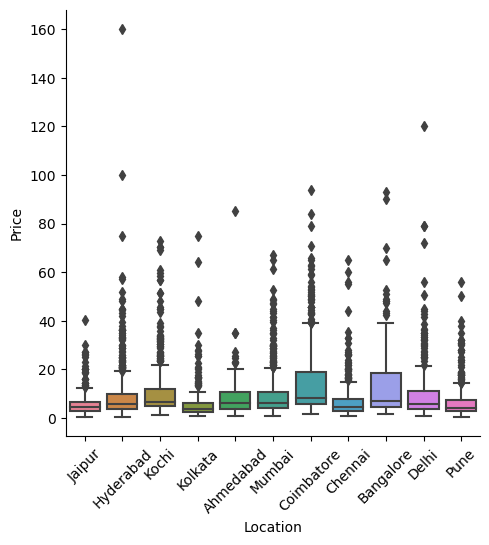

In [18]:
sns.catplot(data=train_data, x="Location", y="Price", kind="box", palette="husl")
plt.xticks(rotation=45)
plt.show()

`Location`에 따라 `Price`에 큰 변화가 일어나진 않는 것 같습니다.

### `Year` - `Price`
오래된 차일수록 가격이 떨어질 수 있습니다.

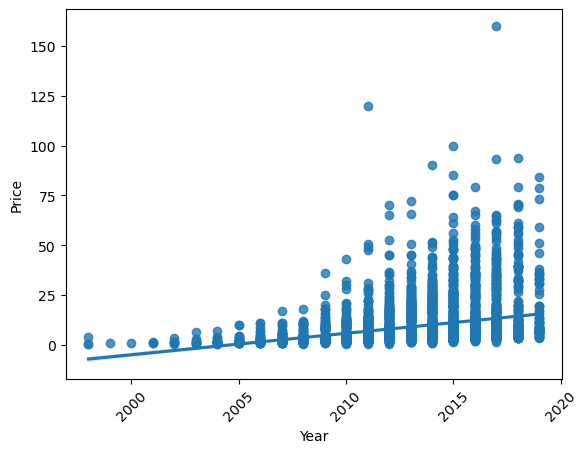

In [19]:
sns.regplot(data=train_data, x="Year", y="Price")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Year와 Price의 선형성 파악하기
train_data["Year"].corr(train_data["Price"])

0.29871074294877903

`Year`와 `Price`의 선형성은 충분히 크지 않은 것으로 보입니다.

### `Kilometers_Driven` - `Price`
달린 거리가 길면 길수록 가격이 떨어질 수 있습니다.

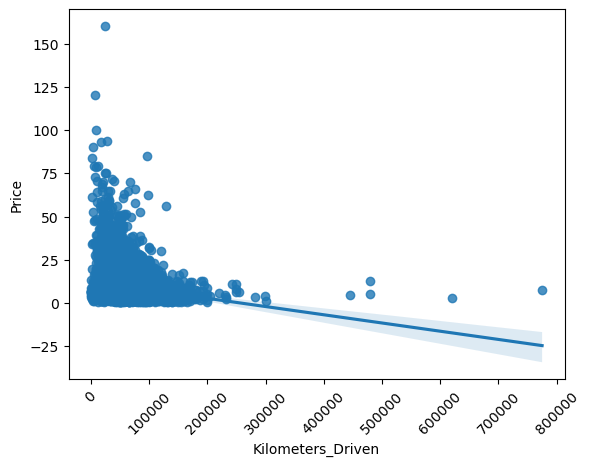

In [21]:
sns.regplot(data=train_data, x="Kilometers_Driven", y="Price")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Kilometers_Driven와 Price의 선형성 파악하기
train_data["Kilometers_Driven"].corr(train_data["Price"])

-0.15993423532130766

`Kilometers_Driven`와 `Price`의 선형성은 충분히 크지 않은 것으로 보입니다. \
`Kilometers_Driven`의 데이터가 치우친 것 같아, 정규성을 확인해보겠습니다.

In [23]:
# Shapiro-Wilk 검정으로 정규성 확인
stats.shapiro(train_data["Kilometers_Driven"])

ShapiroResult(statistic=0.7844538688659668, pvalue=0.0)

`Kilometers_Driven`은 정규성을 가진다고 할 수 없습니다. \
로그 변환을 수행합니다.

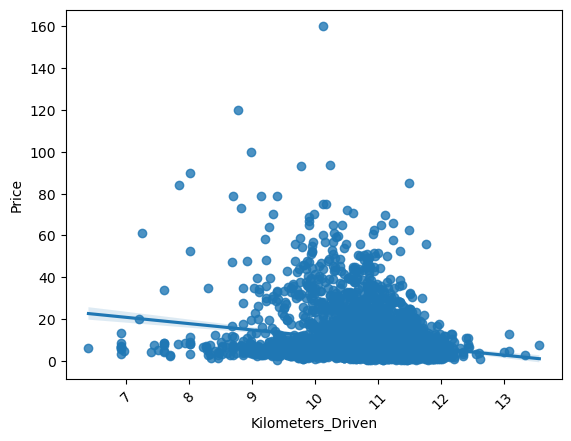

In [24]:
sns.regplot(data=train_data, x=np.log(train_data["Kilometers_Driven"]), y="Price")
plt.xticks(rotation=45)
plt.show()

그래도 여전히 선형관계는 존재하지 않습니다.

### `Mileage` - `Price`

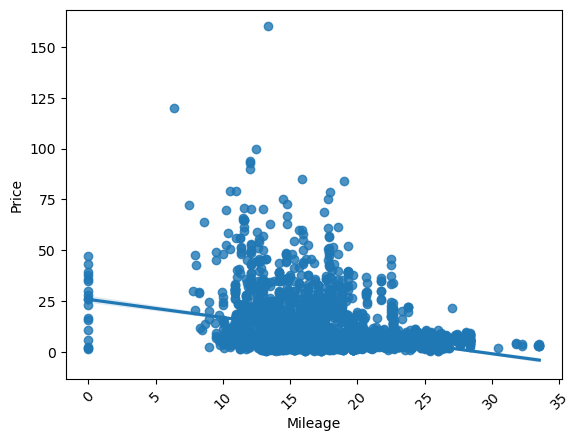

In [25]:
sns.regplot(data=train_data, x="Mileage", y="Price")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Mileage와 Price의 선형성 파악하기
train_data["Mileage"].corr(train_data["Price"])

-0.34534707855497015

### `Engine` - `Price`
엔진의 용량이 클수록 가격이 높을 수 있습니다.

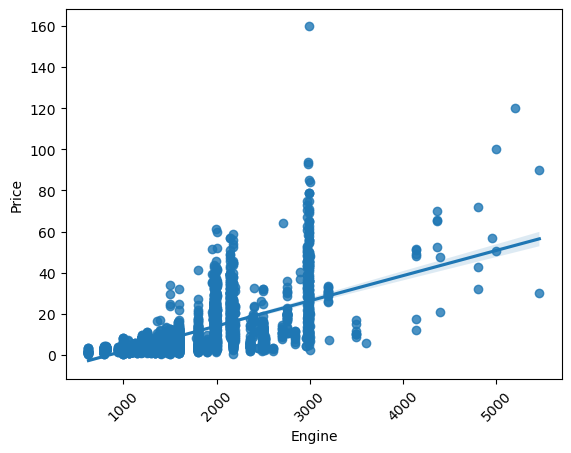

In [27]:
sns.regplot(data=train_data, x="Engine", y="Price")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Engine와 Price의 선형성 파악하기
train_data["Engine"].corr(train_data["Price"])

0.6561926390323302

`Engine`과 `Price` 사이에는 선형관계가 존재한다고 볼 수 있습니다.

### `Power` - `Price`
엔진의 파워가 강할수록 가격이 높을 수 있습니다.

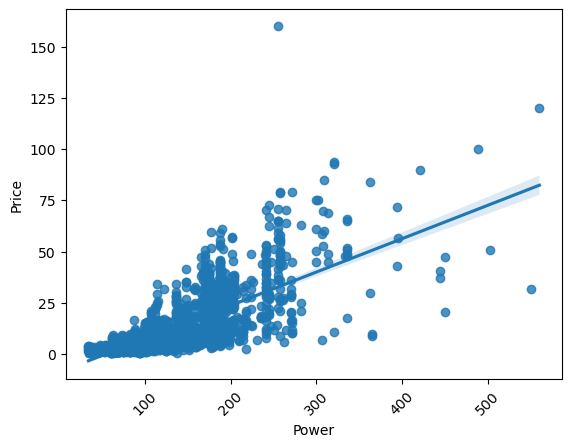

In [29]:
sns.regplot(data=train_data, x="Power", y="Price")
plt.xticks(rotation=45)
plt.show()

Outlier가 일부 보이지만, 두 변수 간 선형관계가 존재하는 것 같습니다.

In [30]:
# Power와 Price의 선형성 파악하기
train_data["Power"].corr(train_data["Price"])

0.7749263371858338

`Power`와 `Price` 사이에는 선형관계가 존재한다고 할 수 있습니다.

### 설명변수 간 선형관계 확인

범주형 변수도 확인할 수 있도록 수치로 변환합니다.

In [31]:
train_data["Owner_Type"].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [32]:
train_data["Owner_Type"].replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)

`Transmission`은 이진 변수이므로, 0 또는 1로 label encoding을 수행합니다.

In [33]:
train_data["Transmission"].replace({"Automatic": 0, "Manual": 1}, inplace=True)

`Location`, `Fuel_Type`은 서로 순서가 존재하지 않으므로 one-hot encoding을 수행합니다.

In [34]:
train_data = pd.get_dummies(train_data, columns=["Location", "Fuel_Type"], drop_first=True)

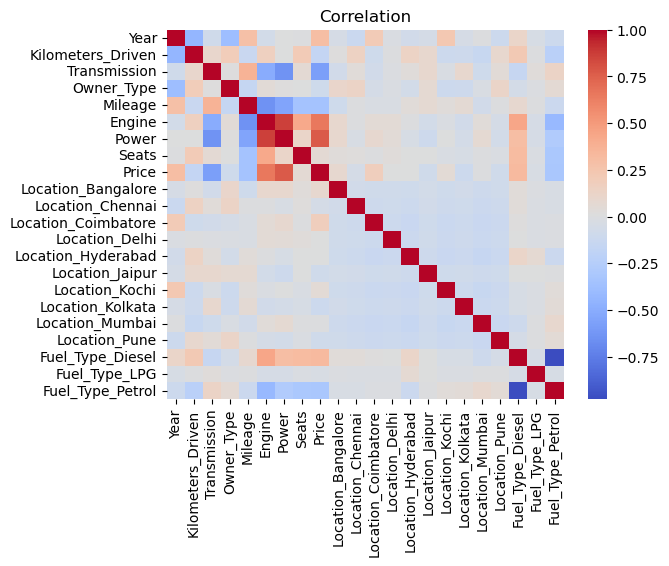

In [35]:
sns.heatmap(train_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation")
plt.show()

`Power`와 `Engine`, `Engine`과 `Mileage` 등은 서로 강한 선형관계가 있는 것 같습니다.
VIF를 확인해 다중공선성을 진단합니다.

In [36]:
vif = pd.DataFrame()
train_data_without_name = train_data.drop(columns=["Name"], inplace=False)
vif["Features"] = train_data_without_name.columns
vif["VIF"] = [variance_inflation_factor(train_data_without_name.values, i) for i in range(train_data_without_name.shape[1])]
vif

,Features,VIF
0,Year,406.647247
1,Kilometers_Driven,4.525240
2,Transmission,6.521954
3,Owner_Type,9.289409
4,Mileage,53.780341
5,Engine,76.237686
6,Power,43.933604
7,Seats,83.944255
8,Price,5.382351
9,Location_Bangalore,2.754591


우선 어떠한 변수도 제거하지 않고 선형회귀분석을 진행합니다. \
진행 전, 수치형 변수의 경우 변수마다 값의 스케일이 다르므로 스케일링해줍니다.

In [37]:
numerical_columns = ["Kilometers_Driven", "Mileage", "Engine", "Power"]
train_data[numerical_columns] = MinMaxScaler().fit_transform(train_data[numerical_columns])

In [38]:
model = LinearRegression()
X = train_data_without_name.drop(columns=["Price"], inplace=False)
y = train_data["Price"]
model.fit(X, y)

LinearRegression()

In [39]:
# R-squared 값 구하기
model.score(X, y)

0.7159415987399844